<a href="https://colab.research.google.com/github/Jamie3099/JamieGISWork/blob/Jamie3099-project/BarleyFINISHED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is going to look at changing land use in terms of farming in the ancient Near East. We are going to be using data from •	Charles M., Dobney C. 2009, *Mesopotamian Environmental Archaeology Database: phase I Iraq* [data set], York: Archaeology Data Service [distributor], DOI: https://doi.org/10.5284/1000128 which you should have already explored.

This study looks at various plant remains across the Near East but for the purposes of this notebook we are going to look at barley. Barley was the stable crop in the ancient Near East so the distribution of it can be proxy data for looking at farming in this region. We will compare data from the Early Dynastic, Akkadian and Neo Assyrian. 
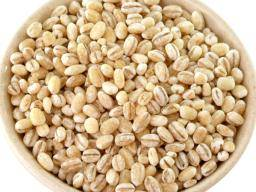

These three periods are good indicators as they mark changes in settlement patterns in Mesopotamia and with changing settlement patterns can come changing land use. Early Dynastic marked the rise of city states, Neo Assyrian was a height for empires and Akkadian marks a nice midway point between the two.

Lets get coding.

In [0]:
#As always we need to import the libraries we need for our exercises

import pandas as pd
import folium
import numpy as np

In [24]:
# Next we read in our data and as you will see it is quite a large dataset
url = "https://raw.githubusercontent.com/Jamie3099/JamieGISWork/Jamie3099-project/Archaeobotany%202.csv"

crops = pd.read_csv(url)

crops.head()


,site code,latitude,longitude,biblio code,amal per,presv,samp count,divrs,barley awn,barley lemma bases,barley rachis,culm nodes,f-t wheat rachis,gw glume bases,wheat indet rachis,cereal indet grain,barley grain,f-t wheat grain,gw grain,millet,oat grain,wheat indet gr,wild einkorn,caper,cucumber,date,fig,grape,hazelnut,olive,pear,pistachio,pomegranate,flax/linseed,sesame,bitter vetch,celtic bean,chickpea,common pea,grass pea,lentil,coriander,cumin,wild/weed
0,agra,33.34,44.46,"Jacobsen, 1982",Uruk,imp,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,muqa,30.56,46.08,"Jacobsen, 1982",Ubaid,imp,2.0,3,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,muqa,30.56,46.08,"Ellison, 1978",E Dynastic,cpr,9.0,6,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,3,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,1
3,muqa,30.56,46.08,"Jacobsen, 1982",E Dynastic,imp,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,muqa,30.56,46.08,"Ellison, 1978",E Dynastic,imp/m,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [25]:
#Since we are looking at barley for this notebook we want to isolate the 'barley grain' column. This is called taking a subset.
barley = crops[['site code', 'amal per', 'latitude', 'longitude', 'barley grain']]
barley.head()

,site code,amal per,latitude,longitude,barley grain
0,agra,Uruk,33.34,44.46,1
1,muqa,Ubaid,30.56,46.08,2
2,muqa,E Dynastic,30.56,46.08,2
3,muqa,E Dynastic,30.56,46.08,1
4,muqa,E Dynastic,30.56,46.08,0


In [26]:
#Now we are going to install geopandas as these are not in the colab system. This next part is just a different way to visualise our data

!pip install geopandas

In [0]:
#Let's import more libraries
%matplotlib inline
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#Geopandas are good for looking at categorical data but before we visualise our data we have to create a dataframe for the data so geopandas can read it.
cmap = gpd.GeoDataFrame(
    crops, geometry=gpd.points_from_xy(crops.longitude, crops.latitude))
print(cmap.head())

  site code  latitude  longitude  ... cumin wild/weed                   geometry
0      agra     33.34      44.46  ...     0         0  POINT (44.46000 33.34000)
1      muqa     30.56      46.08  ...     0         0  POINT (46.08000 30.56000)
2      muqa     30.56      46.08  ...     0         1  POINT (46.08000 30.56000)
3      muqa     30.56      46.08  ...     0         0  POINT (46.08000 30.56000)
4      muqa     30.56      46.08  ...     0         0  POINT (46.08000 30.56000)

[5 rows x 45 columns]


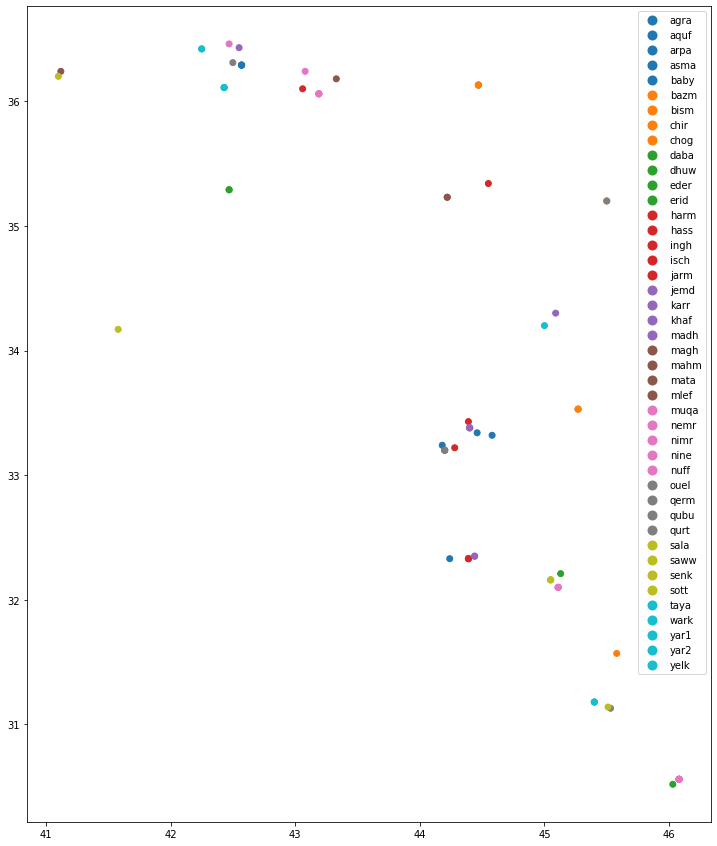

In [29]:
#Now we plot
#We are plotting our sites with coloured points and we are plotting them by 'site code' which as you can see has some weird abbreviations. 
cmap.plot(column='site code', categorical=True, legend=True, figsize=(15,15))

In [30]:
#However we want the barley data so let's do the same with our barley dataset. Turn it into a dataframe
bmap = gpd.GeoDataFrame(
    barley, geometry=gpd.points_from_xy(barley.longitude, barley.latitude))
print(bmap.head())

  site code    amal per  ...  barley grain                   geometry
0      agra        Uruk  ...             1  POINT (44.46000 33.34000)
1      muqa       Ubaid  ...             2  POINT (46.08000 30.56000)
2      muqa  E Dynastic  ...             2  POINT (46.08000 30.56000)
3      muqa  E Dynastic  ...             1  POINT (46.08000 30.56000)
4      muqa  E Dynastic  ...             0  POINT (46.08000 30.56000)

[5 rows x 6 columns]


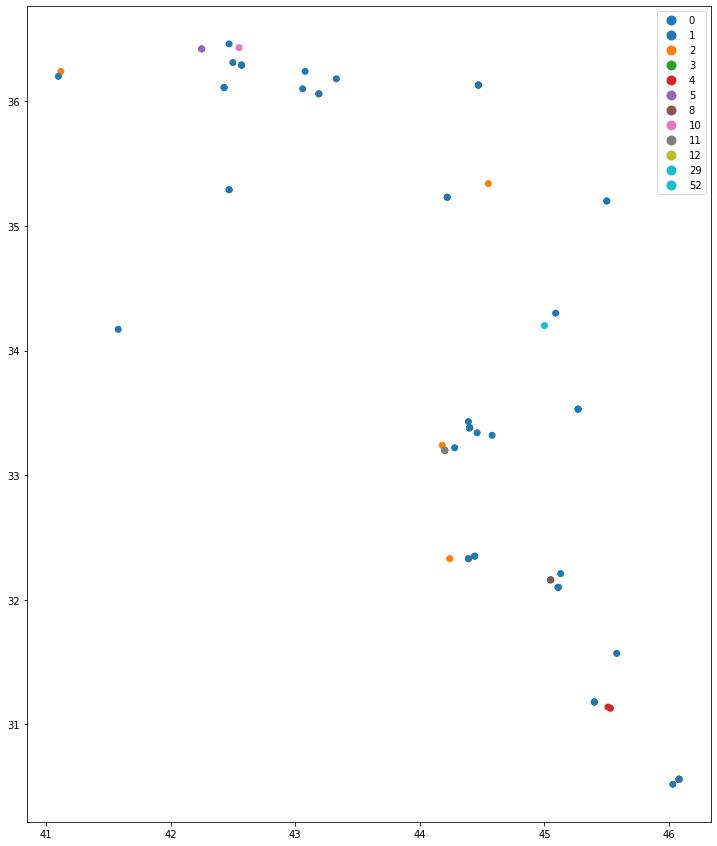

In [49]:
#This time we are plotting and colouring the points by how much barley was found at each site

bmap.plot(column='barley grain', categorical=True, legend=True, figsize=(15,15))

Here we used geopandas instead of pandas. What are the differences and perhaps the advantages or disadvantages of each?

As you can see, however, there isn't a map behind it so we have no idea where the sites are. This next exercise generatesa heat map like we did in the lapis lazuli exercise. 


In [0]:
#For this next part of the exercise we need more tools from folium
from folium import plugins

In [0]:
#These are said tools
from folium.plugins import HeatMapWithTime
from folium.plugins import HeatMap
from folium.plugins import MeasureControl

In [34]:
#We are going to get a heatmap as we did in the Lapis Lazuli notebook so as we did before for our base map we need to define its centre
location_survey=barley['latitude'].mean(), barley['longitude'].mean()
print(location_survey)

(33.7778481012658, 44.239493670886084)


In [0]:
#And as like before we define the base map
def generateBaseMap(default_location=[33.7778481012658, 44.239493670886084], default_zoom_start=7.9):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [45]:
#And generate. If you feel it's too zoomed in feel free to change the zoom_start part and re run the cells
base_map = generateBaseMap()
base_map

In [38]:
#As I said at the beginning we are going to be using Early Dynastic, Akkadian and Neo Assyrian data.
#Let's get in the Early Dynastic Data
barleyED = barley[(barley['amal per']=="E Dynastic") ]

barleyED.head()

,site code,amal per,latitude,longitude,barley grain,geometry
2,muqa,E Dynastic,30.56,46.08,2,POINT (46.08000 30.56000)
3,muqa,E Dynastic,30.56,46.08,1,POINT (46.08000 30.56000)
4,muqa,E Dynastic,30.56,46.08,0,POINT (46.08000 30.56000)
24,chog,E Dynastic,33.53,45.27,0,POINT (45.27000 33.53000)
64,sala,E Dynastic,32.16,45.05,52,POINT (45.05000 32.16000)


In [39]:
#And the Akkadian
barleyakk = barley[(barley['amal per']=="Akkadian") ]
barleyakk.head()

,site code,amal per,latitude,longitude,barley grain,geometry
5,muqa,Akkadian,30.56,46.08,0,POINT (46.08000 30.56000)
6,muqa,Akkadian,30.56,46.08,2,POINT (46.08000 30.56000)
14,asma,Akkadian,33.32,44.58,1,POINT (44.58000 33.32000)
19,bazm,Akkadian,36.13,44.47,1,POINT (44.47000 36.13000)
30,harm,Akkadian,33.22,44.28,0,POINT (44.28000 33.22000)


In [40]:
#And finally the Neo Assyrian
barleyNA = barley[(barley['amal per']=="Neo Assyrian") ]
barleyNA.head()

,site code,amal per,latitude,longitude,barley grain,geometry
8,muqa,Neo Assyrian,30.56,46.08,1,POINT (46.08000 30.56000)
15,baby,Neo Assyrian,32.33,44.24,2,POINT (44.24000 32.33000)
20,bism,Neo Assyrian,31.57,45.58,1,POINT (45.58000 31.57000)
46,mahm,Neo Assyrian,33.20,44.20,3,POINT (44.20000 33.20000)
52,nimr,Neo Assyrian,36.06,43.19,12,POINT (43.19000 36.06000)


In [46]:
#This should look familiar. These are the same steps for the Lapis Lazuli notebook.
base_map = generateBaseMap()

#Here we define our layers
ED = HeatMap(data=barleyED[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
Akk = HeatMap(data=barleyakk[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
NA = HeatMap(data=barleyNA[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

#And ive the layers SENSIBLE names
ED.layer_name = 'Early Dynastic'
Akk.layer_name = 'Akkadian'
NA.layer_name = 'Neo Assyrian'

#Check that it works
folium.LayerControl().add_to(base_map)

In [47]:
#Generate the base map. You may need to zoom out if you cannot see anything
#Remember to toggle the layers so you can see the changes between the periods
base_map

Now we can see that Early Dynastic has the most barley grains found out of our three periods. This could tell us that farming declined through the periods or that the sites relationship with their hinterland changed. It is hard to tell from plant proxy data we need more data to get a fully rounded picture. 

We do know though that farming continued throughout this period and that the Mesopotamian population also started farming different crops as can be seen from the large dataset used in this notebook.

# Questions to think about
1. What other data could we use to get a picture of the sites relationship with it's surrunding hinterland and landscape
2. In our last notebook the presence of lapis lazuli told us about power dynamics in our sites, does this tell us anything about power dynamics?